In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
data1 = pd.read_csv("heart.csv")

In [14]:
data1.shape

(918, 12)

In [15]:
duplicate_rows = data1[data1.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (0, 12)


In [16]:
data1 = data1.drop_duplicates()
duplicate_rows = data1[data1.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (0, 12)


In [17]:
data1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [21]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
enc.fit(data1['Sex'])
data1['Sex']=enc.transform(data1['Sex'])

In [23]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
enc.fit(data1['ChestPainType'])
data1['ChestPainType']=enc.transform(data1['ChestPainType'])

In [29]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
enc.fit(data1['RestingECG'])
data1['RestingECG']=enc.transform(data1['RestingECG'])

In [30]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
enc.fit(data1['ST_Slope'])
data1['ST_Slope']=enc.transform(data1['ST_Slope'])

In [31]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
enc.fit(data1['ExerciseAngina'])
data1['ExerciseAngina']=enc.transform(data1['ExerciseAngina'])

<AxesSubplot:xlabel='ExerciseAngina'>

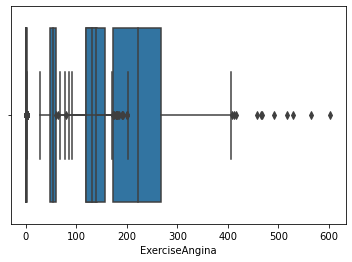

In [33]:
sns.boxplot(x=data1['Age'])
sns.boxplot(x=data1['Sex'])
sns.boxplot(x=data1['ChestPainType'])
sns.boxplot(x=data1['RestingBP'])
sns.boxplot(x=data1['Cholesterol'])
sns.boxplot(x=data1['FastingBS'])
sns.boxplot(x=data1['RestingECG'])
sns.boxplot(x=data1['MaxHR'])
sns.boxplot(x=data1['ExerciseAngina'])



In [41]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3-Q1
print('*********** InterQuartile Range ***********')
print(IQR)
data2 = data1[~((data1<(Q1-1.5*IQR))|(data1>(Q3+1.5*IQR))).any(axis=1)]
data2.shape

*********** InterQuartile Range ***********
Age               13.00
Sex                0.00
ChestPainType      2.00
RestingBP         20.00
Cholesterol       93.75
FastingBS          0.00
RestingECG         0.00
MaxHR             36.00
ExerciseAngina     1.00
Oldpeak            1.50
ST_Slope           1.00
HeartDisease       1.00
dtype: float64


(278, 12)

<AxesSubplot:>

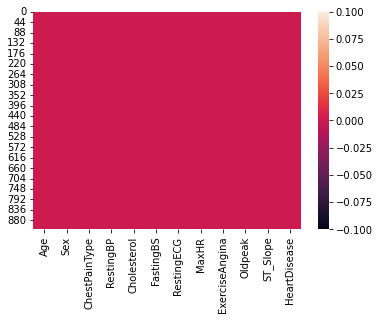

In [48]:
sns.heatmap(data1.isnull())

In [44]:
from sklearn.model_selection import train_test_split
x = data2.drop("HeartDisease", axis=1)
y = data2["HeartDisease"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
DECISION TREE ALGO

In [55]:
from sklearn import tree
dt_clf=tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(x_train,y_train)
dt_clf.score(x_test,y_test)
y_pred=dt_clf.predict(x_test)
dt_clf.score(x_test,y_test)

0.7857142857142857

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

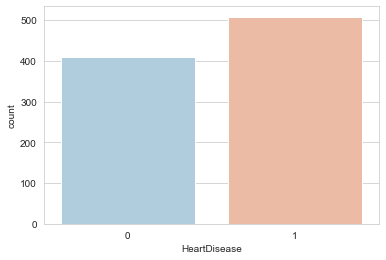

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='HeartDisease',data=data1,palette='RdBu_r')

In [66]:
y_pred=dt_clf.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[35  9]
 [ 9 31]]


In [ ]:
RANDOM FOREST ALGO

In [54]:
from sklearn import ensemble
rf_clf=ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)
rf_clf.score(x_test,y_test)

0.8571428571428571

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


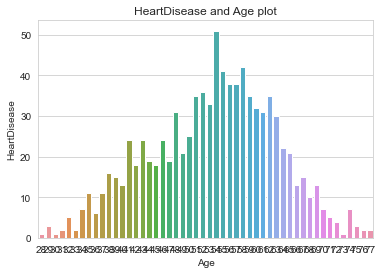

In [76]:
sns.countplot(data1["Age"])
plt.xlabel("Age")
plt.ylabel("HeartDisease")
plt.title("HeartDisease and Age plot")
plt.show()


In [ ]:
K NEAREST NEIGHBORS ALGO

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train,y_train)
knn_clf.score(x_test,y_test)

y_pred=knn_clf.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score


In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

accuracy_rate=[]

for i in range(1,40):
    classifier= KNeighborsClassifier(n_neighbors =i)
    score = cross_val_score(classifier,x,y,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy_Rate')

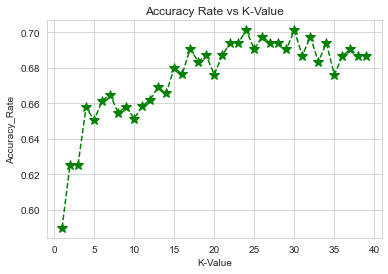

In [75]:
plt.plot(range(1,40),accuracy_rate, color= 'green',linestyle = 'dashed',marker='*', markersize=10)
plt.title('Accuracy Rate vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Accuracy_Rate')

In [ ]:
LOGISTIC REGRESSION ALGO

In [62]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8452380952380952

In [68]:
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66        44
           1       0.63      0.68      0.65        40

    accuracy                           0.65        84
   macro avg       0.66      0.66      0.65        84
weighted avg       0.66      0.65      0.65        84

[[28 16]
 [13 27]]
